## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset** [datarium package], which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [2]:
# Due to datarium package unavailability oh phyton , we will generate the dataset manually but exactly same with original package.

import pandas as pd
import io

# original csv data from datarium package headache dataset (r-studio used)
csv_data = """id,gender,risk,treatment,pain_score
1,male,low,X,79.311695101863
2,male,low,X,76.8433992634502
3,male,low,X,70.8324206265578
4,male,low,X,81.1639437445698
5,male,low,X,75.0522130529183
6,male,low,X,73.1070253913004
7,male,low,Y,68.1799263705993
8,male,low,Y,80.6771628613505
9,male,low,Y,75.3300201846504
10,male,low,Y,73.4409145328037
11,male,low,Y,73.2810503904802
12,male,low,Y,67.9235598885062
13,male,low,Z,75.0488703901053
14,male,low,Z,68.299416025296
15,male,low,Z,69.3918030045586
16,male,low,Z,78.9106323222428
17,male,low,Z,80.4327751513521
18,male,low,Z,74.6516789896562
19,male,high,X,94.086291683712
20,male,high,X,100
21,male,high,X,92.6987050709176
22,male,high,X,95.7105807328005
23,male,high,X,86.293706226542
24,male,high,X,87.6437981549395
25,male,high,Y,78.5755551245162
26,male,high,Y,82.240188168485
27,male,high,Y,84.4497505566092
28,male,high,Y,77.5244615544161
29,male,high,Y,91.1785168860335
30,male,high,Y,80.0807786970978
31,male,high,Z,74.4198647460016
32,male,high,Z,82.2039328934565
33,male,high,Z,81.3234575439892
34,male,high,Z,75.6637650316886
35,male,high,Z,85.0564629556376
36,male,high,Z,79.4169325480297
37,female,low,X,68.6139362047714
38,female,low,X,77.7499842959599
39,female,low,X,74.2627857851047
40,female,low,X,71.2529026010289
41,female,low,X,74.9863626515179
42,female,low,X,78.0714120033346
43,female,low,Y,70.0810683548761
44,female,low,Y,63.7326172260786
45,female,low,Y,68.5139077267274
46,female,low,Y,74.7460045132063
47,female,low,Y,68.9539816073345
48,female,low,Y,64.1439722841892
49,female,low,Z,69.0173384744154
50,female,low,Z,72.1414158834463
51,female,low,Z,65.4494080505099
52,female,low,Z,68.8156057132019
53,female,low,Z,73.0963261482187
54,female,low,Z,70.1572381041725
55,female,high,X,81.469781033744
56,female,high,X,82.6570630084178
57,female,high,X,68.3601845243011
58,female,high,X,78.5919513419939
59,female,high,X,81.3171398202843
60,female,high,X,80.7942315907146
61,female,high,Y,84.1946369883082
62,female,high,Y,73.14439241953
63,female,high,Y,79.5025529565093
64,female,high,Y,81.5372329205206
65,female,high,Y,82.0819168668896
66,female,high,Y,86.5910893376683
67,female,high,Z,74.988057290167
68,female,high,Z,82.7863000562731
69,female,high,Z,81.2656357193351
70,female,high,Z,80.4195533061328
71,female,high,Z,87.1422645214203
72,female,high,Z,79.6090405005233"""

# CSV to DataFrame
df = pd.read_csv(io.StringIO(csv_data))
# add variable column
df['variable'] = 'pain_score'


### Descriptive statistics

In [3]:

desc_stats = df.groupby(['gender', 'risk', 'treatment', 'variable'])['pain_score'].agg(['count', 'mean', 'std']).reset_index()
desc_stats.columns = ['gender', 'risk', 'treatment', 'variable', 'n', 'mean', 'sd']

print("Descriptive Statistics")
print(desc_stats)

Descriptive Statistics
    gender  risk treatment    variable  n       mean        sd
0   female  high         X  pain_score  6  78.865059  5.316489
1   female  high         Y  pain_score  6  81.175304  4.619387
2   female  high         Z  pain_score  6  81.035142  3.984886
3   female   low         X  pain_score  6  74.156231  3.690272
4   female   low         Y  pain_score  6  68.361925  4.081842
5   female   low         Z  pain_score  6  69.779555  2.719645
6     male  high         X  pain_score  6  92.738847  5.116095
7     male  high         Y  pain_score  6  82.341542  5.000898
8     male  high         Z  pain_score  6  79.680736  4.045885
9     male   low         X  pain_score  6  76.051783  3.854876
10    male   low         Y  pain_score  6  73.138772  4.765061
11    male   low         Z  pain_score  6  74.455863  4.888865


The descriptive analysis revealed that the highest average pain score of 92.7 was observed among "Males" (Treatment X) in the "High Risk" group. This suggests that Treatment X may not have provided the expected relief in this specific group.

Looking at the "Low Risk" group, the lowest pain score among women was 68.4 in Treatment Y, while the lowest score among men was 73.1, also recorded in Treatment Y. This suggests that Treatment Y is generally more successful in low-risk patients.

It has been observed that men in the high-risk group have higher pain scores than women in all treatment types (X, Y, Z). The difference between men (92.7) and women (78.9) is particularly pronounced in Treatment X. Accordingly, it appears that women are more resistant to pain.

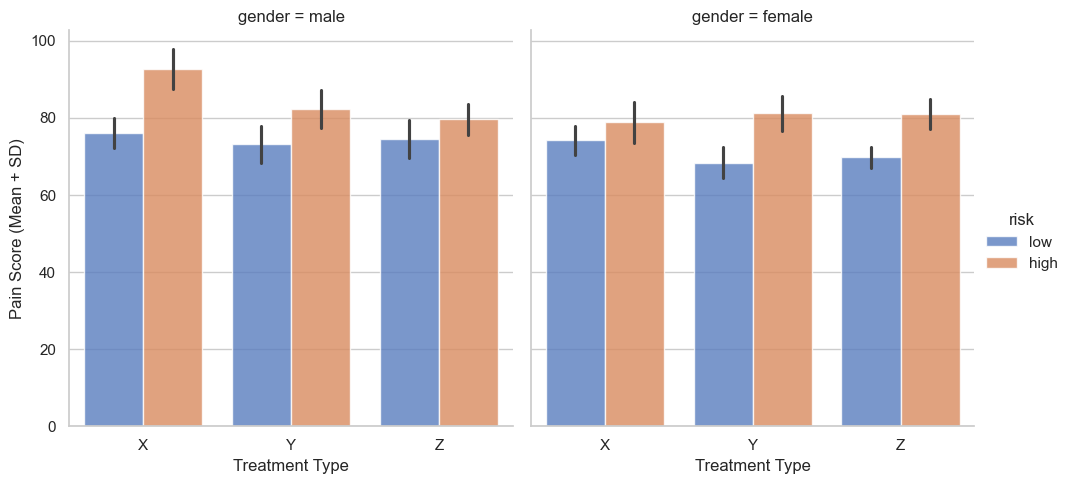

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="treatment", y="pain_score", hue="risk", col="gender",
    errorbar="sd", palette="muted", alpha=.8, height=5
)
g.set_axis_labels("Treatment Type", "Pain Score (Mean + SD)")
plt.show()

When examining the bar chart, it is observed that treatment responses differ between men and women according to risk groups. Specifically, Treatment X has the highest pain score among high-risk men, while the differences between Treatment Y and Z are less pronounced among women. Error bars indicate that the variation within groups is consistent.

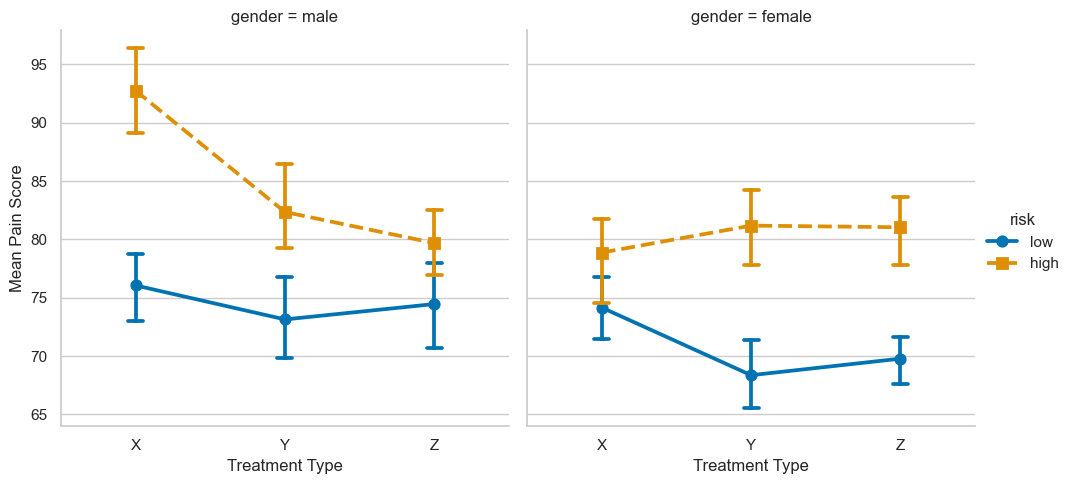

In [5]:
g2 = sns.catplot(
    data=df, kind="point",
    x="treatment", y="pain_score", hue="risk", col="gender",
    markers=["o", "s"], linestyles=["-", "--"],
    capsize=.1, palette="colorblind", height=5
)
g2.set_axis_labels("Treatment Type", "Mean Pain Score")
plt.show()

Interaction Plot shows how treatment and risk factors combine based on gender. In the left panel (Men), the lines for the high- and low-risk groups show a sharp difference in slope as they transition from Treatment X to Y, while in the right panel (Women), the lines are more parallel. This visual finding provides strong evidence that the 'Gender x Risk x Treatment' interaction may be statistically significant.

### Assumptions

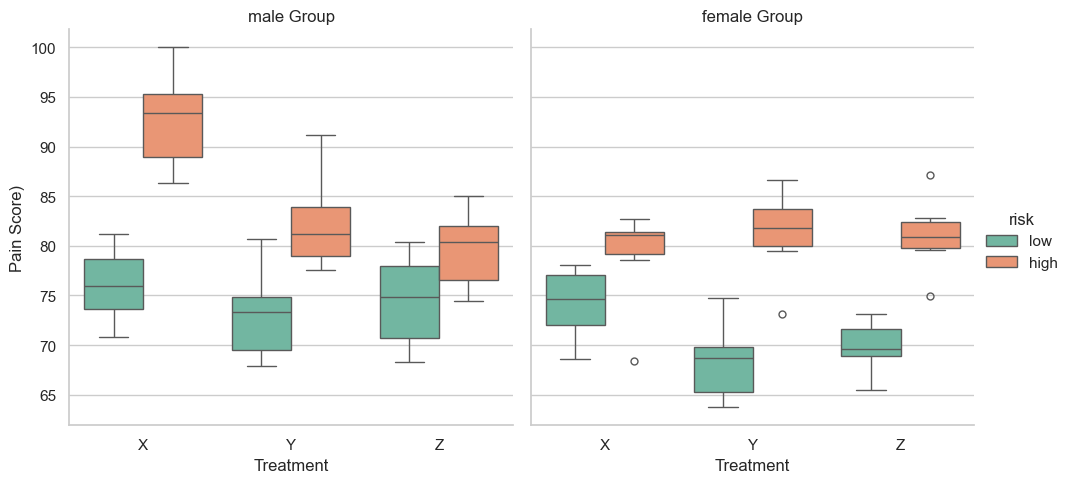

Outliers Detected:
 gender  risk  treatment    
female  high  X          56    68.360185
              Y          61    73.144392
              Z          66    74.988057
                         70    87.142265
Name: pain_score, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# both genders boxplot
g = sns.catplot(
    data=df, x='treatment', y='pain_score', hue='risk', col='gender', 
    kind='box', palette="Set2", height=5
)
g.set_axis_labels("Treatment", "Pain Score)")
g.set_titles("{col_name} Group") # Male / Female 
plt.show()

# IQR
def find_outliers(group):
    q1, q3 = group.quantile([0.25, 0.75])
    iqr = q3 - q1
    return group[(group < q1 - 1.5*iqr) | (group > q3 + 1.5*iqr)]

outlier_results = df.groupby(['gender', 'risk', 'treatment'])['pain_score'].apply(find_outliers)
print("Outliers Detected:\n", outlier_results)

Statistical calculations (IQR method) revealed that:

-No outliers were found in the male group; this indicates that the responses of male subjects to treatment were homogeneous within the group.

-In the female group, however, four outliers were identified, particularly among high-risk individuals.

#### Normality

In [7]:
from scipy.stats import shapiro

#Shapiro-Wilk for normality test for each subgroup
normality_results = df.groupby(['gender', 'risk', 'treatment'])['pain_score'].apply(lambda x: shapiro(x)[1])
print("Shapiro-Wilk P-values:\n", normality_results)

Shapiro-Wilk P-values:
 gender  risk  treatment
female  high  X            0.008690
              Y            0.653824
              Z            0.900604
        low   X            0.599938
              Y            0.555428
              Z            0.800946
male    high  X            0.807595
              Y            0.384257
              Z            0.784303
        low   X            0.961928
              Y            0.507324
              Z            0.535007
Name: pain_score, dtype: float64


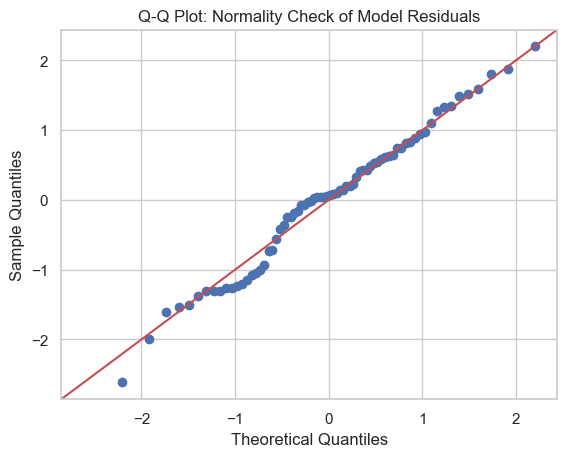

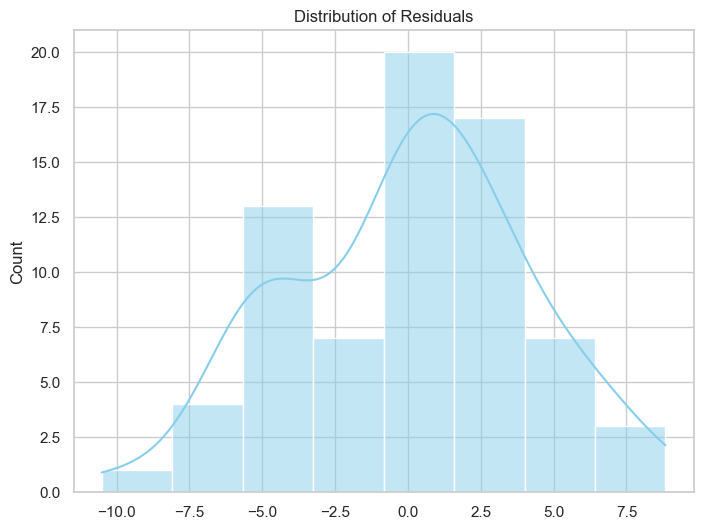

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

model = ols('pain_score ~ gender * risk * treatment', data=df).fit()
residuals = model.resid
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot: Normality Check of Model Residuals")
plt.show()

#histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="skyblue")
plt.title("Distribution of Residuals")
plt.show()

Q-Q Plot Graph: It has been observed that the vast majority of data points lie on or very close to the 45-degree reference line. This indicates that the data highly conforms to the assumption of normal distribution.


Histogram Chart: When examining the distribution of residuals, it is seen that the data clusters around a central value and exhibits a distinct bell curve shape.


Both statistical tests and these visual findings confirm that the normality assumption required for the 3-Way ANOVA analysis is met.

#### Homogeneity of Variance

In [9]:
from scipy.stats import levene

# Levene Test
# separate all groups and apply the test
groups = [group['pain_score'].values for name, group in df.groupby(['gender', 'risk', 'treatment'])]
stat, p = levene(*groups)

print(f"Levene’s Test Result: Statistic={stat:.4f}, p-value={p:.4f}")

Levene’s Test Result: Statistic=0.1786, p-value=0.9982


The Levene test applied to check for equality of variance between groups resulted in a p-value of 0.9982. Since p>0.05, the assumption of homogeneity of variance is fully satisfied.

### ANOVA

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 3-way ANOVA
formula = 'pain_score ~ C(gender) * C(risk) * C(treatment)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("3-Way ANOVA result table")
print(anova_table)

3-Way ANOVA result table
                                     sum_sq    df          F        PR(>F)
C(gender)                        313.358773   1.0  16.195746  1.625409e-04
C(risk)                         1793.555757   1.0  92.698774  8.799980e-14
C(treatment)                     283.168031   2.0   7.317679  1.432844e-03
C(gender):C(risk)                  2.730584   1.0   0.141128  7.084867e-01
C(gender):C(treatment)           129.182324   2.0   3.338353  4.220011e-02
C(risk):C(treatment)              27.595016   2.0   0.713115  4.942214e-01
C(gender):C(risk):C(treatment)   286.595625   2.0   7.406255  1.334476e-03
Residual                        1160.892871  60.0        NaN           NaN


Main Effects: Gender (p<0.001), Risk (p<0.001), and Treatment (p=0.0014) were each found to have a statistically significant main effect on pain scores.


Two-Way Interactions: The interaction between Gender and Treatment (p=0.042) was found to be significant, while the other two-way interactions were not significant.


Three-Way Interaction: As the most critical finding, the Gender x Risk x Treatment interaction was found to be statistically significant (F(2,60)=7.41, p=0.0013).


RESULT: The significant three-way interaction proves that the effect of treatment on pain varies according to both the patient's gender and risk group. Therefore, looking only at the main effects would be misleading.


<Figure size 1200x600 with 0 Axes>

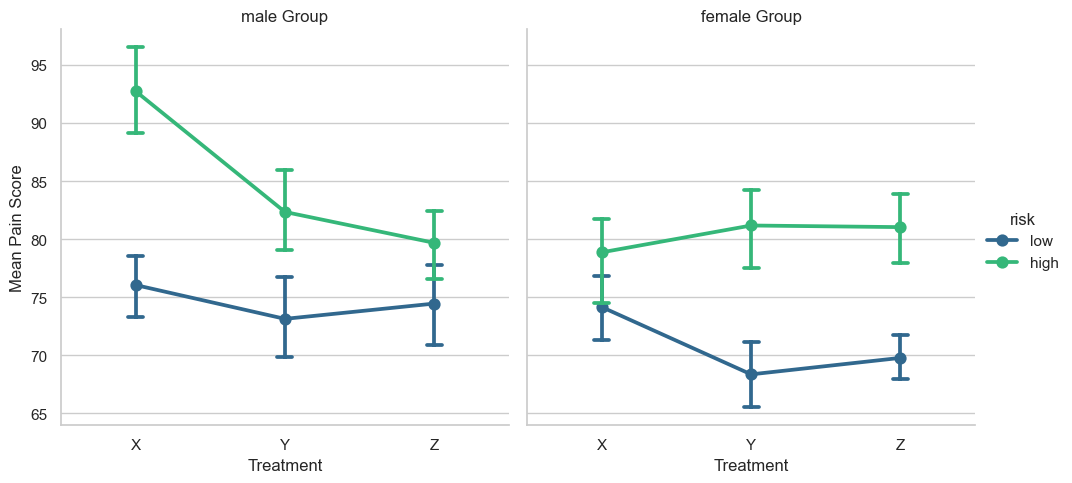

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=df, x="treatment", y="pain_score", hue="risk", col="gender",
    kind="point", capsize=.1, palette="viridis", height=5, aspect=1
)
g.set_axis_labels("Treatment", "Mean Pain Score")
g.set_titles("{col_name} Group")

plt.show()

 These images make the finding that 'Treatment X is risky in high-risk men' clinically more apparent, which cannot be discerned by looking at the numbers alone.

### Post-hoc tests

If there is a significant 3-way interaction effect, you can decompose it into:

-    Simple two-way interaction: run two-way interaction at each level of third variable,
-    Simple simple main effect: run one-way model at each level of second variable,
-    Simple simple pairwise comparisons: run pairwise or other post-hoc comparisons if necessary.

If you do not have a statistically significant three-way interaction, you need to determine whether you have any statistically significant two-way interaction from the ANOVA output. You can follow up a significant two-way interaction by simple main effects analyses and pairwise comparisons between groups if necessary.

#### Two-way interactions

In [12]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# separate data by gender
male_df = df[df['gender'] == 'male']
female_df = df[df['gender'] == 'female']

# two way interaction for men
model_m = ols('pain_score ~ C(risk) * C(treatment)', data=male_df).fit()
anova_m = sm.stats.anova_lm(model_m, typ=2)

# two way interaction for women 
model_f = ols('pain_score ~ C(risk) * C(treatment)', data=female_df).fit()
anova_f = sm.stats.anova_lm(model_f, typ=2)

print("Risk for Men * Treatment")
print(anova_m)
print("\nRisk for Women * Treatment")
print(anova_f)

Risk for Men * Treatment
                          sum_sq    df          F        PR(>F)
C(risk)               968.124984   1.0  45.022276  1.954190e-07
C(treatment)          393.710706   2.0   9.154682  7.876787e-04
C(risk):C(treatment)  203.220142   2.0   4.725337  1.644381e-02
Residual              645.097320  30.0        NaN           NaN

Risk for Women * Treatment
                          sum_sq    df          F        PR(>F)
C(risk)               828.161356   1.0  48.168001  1.042751e-07
C(treatment)           18.639649   2.0   0.542065  5.871351e-01
C(risk):C(treatment)  110.970499   2.0   3.227165  5.377519e-02
Residual              515.795551  30.0        NaN           NaN


Male Group: A statistically significant simple two-way interaction between Risk and Treatment was found (F(2,30)=4.73, p=0.016).


Female Group: The simple two-way interaction between Risk and Treatment was not statistically significant (F(2,30)=3.23, p=0.054). However, since the p-value is borderline (0.054), it should be examined carefully.

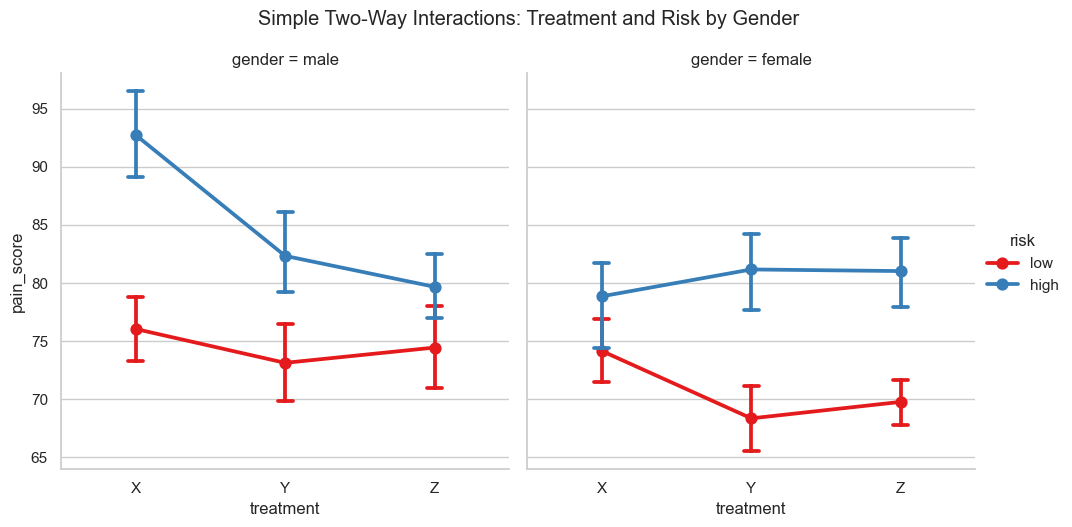

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df, x='treatment', y='pain_score', hue='risk', col='gender',
    kind='point', capsize=.1, height=5, aspect=1, palette='Set1'
)
g.fig.suptitle("Simple Two-Way Interactions: Treatment and Risk by Gender", y=1.05)

plt.show()

Interaction in Male Patients: The interaction between 'Risk' and 'Treatment' is significant for men (p=0.016). Examining the interaction graph, it is seen that Treatment X significantly increases pain in high-risk men, while treatments produce more similar results in low-risk men. This indicates that treatment selection in men is closely tied to risk level.


Interaction in Female Patients: In the female group, the interaction between risk and treatment fell just outside the threshold for statistical significance (p=0.054). Graphical analysis indicates that, regardless of risk level, Treatments Y and Z provided a more stable low pain score than Treatment X in women.

#### Main effects

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# testing the effect of treatment within each subgroup
groups = df.groupby(['gender', 'risk'])

for name, group in groups:
    model = ols('pain_score ~ C(treatment)', data=group).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    print(f"{name} Group Treatment Effect")
    print(anova_result)
    print("-" * 30)

('female', 'high') Group Treatment Effect
                  sum_sq    df         F    PR(>F)
C(treatment)   20.132278   2.0  0.461164  0.639198
Residual      327.415509  15.0       NaN       NaN
------------------------------
('female', 'low') Group Treatment Effect
                  sum_sq    df         F    PR(>F)
C(treatment)  109.477870   2.0  4.358657  0.032188
Residual      188.380042  15.0       NaN       NaN
------------------------------
('male', 'high') Group Treatment Effect
                  sum_sq    df          F    PR(>F)
C(treatment)  571.396212   2.0  12.687808  0.000595
Residual      337.762949  15.0        NaN       NaN
------------------------------
('male', 'low') Group Treatment Effect
                  sum_sq    df         F    PR(>F)
C(treatment)   25.534637   2.0  0.623132  0.549583
Residual      307.334371  15.0       NaN       NaN
------------------------------


The effect of treatment on pain scores was found to be significant in the following groups:


High-Risk Men: The effect of treatment is very strong and significant (p=0.0006).


Low-Risk Women: The effect of treatment is significant (p=0.0322).


In conclusion, no statistically significant difference was found between treatments in the low-risk men (p=0.549) and high-risk women (p=0.639) groups. This finding demonstrates that the success of the treatment is not the same for every patient profile.

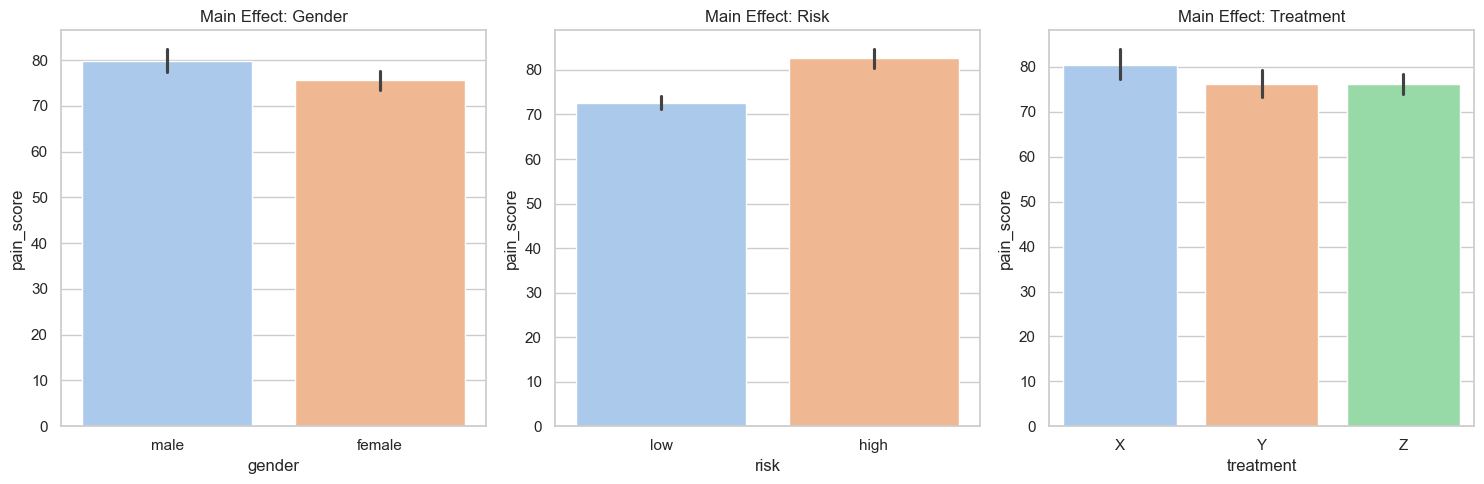

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 5))

# main effects:gender
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='gender', y='pain_score', errorbar='ci', palette='pastel')
plt.title('Main Effect: Gender')

# main effects:risk
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='risk', y='pain_score', errorbar='ci', palette='pastel')
plt.title('Main Effect: Risk')

# main effects:treatment
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='treatment', y='pain_score', errorbar='ci', palette='pastel')
plt.title('Main Effect: Treatment')

plt.tight_layout()
plt.show()

Gender: The overall pain score average for men is higher than that for women (p<0.001).


Risk: Pain scores for individuals in the high-risk group are significantly higher than those in the low-risk group (p<0.001).


Treatment: Among the three treatment methods, Treatment X generally has the highest pain score, while Y and Z show lower scores (p=0.0014).


#### Pairwise Comparisons


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# comparison of significannt groups
# high risk male
hr_male = df[(df['gender'] == 'male') & (df['risk'] == 'high')]
tukey_hr_male = pairwise_tukeyhsd(hr_male['pain_score'], hr_male['treatment'])

# low risk female
lr_female = df[(df['gender'] == 'female') & (df['risk'] == 'low')]
tukey_lr_female = pairwise_tukeyhsd(lr_female['pain_score'], lr_female['treatment'])

print("High-Risk Male Groups Comparison:\n", tukey_hr_male)
print("\nLow-Risk Female Groups Comparison:\n", tukey_lr_female)

High-Risk Male Groups Comparison:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     X      Y -10.3973 0.0047 -17.5135 -3.2811   True
     X      Z -13.0581 0.0007 -20.1743 -5.9419   True
     Y      Z  -2.6608 0.6054   -9.777  4.4554  False
-----------------------------------------------------

Low-Risk Female Groups Comparison:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     X      Y  -5.7943 0.0319 -11.1088 -0.4798   True
     X      Z  -4.3767 0.1153  -9.6912  0.9378  False
     Y      Z   1.4176 0.7712  -3.8969  6.7321  False
-----------------------------------------------------


According to Tukey HSD test results:


In High-Risk Men: There are significant differences between Treatment X and Treatment Y (p=0.0047) and between Treatment X and Treatment Z (p=0.0007). Treatment X caused significantly higher pain scores (failure) in this group compared to the other two treatments. There is no significant difference between treatments Y and Z.


In Low-Risk Women: A significant difference was found only between Treatment X and Treatment Y (p=0.0319). In this group, Treatment Y was more successful than Treatment X in reducing pain scores.


Final Decision: Clinically, Treatment X should be avoided in high-risk male patients; in low-risk women, Treatment Y, which yields the best results, should be preferred.


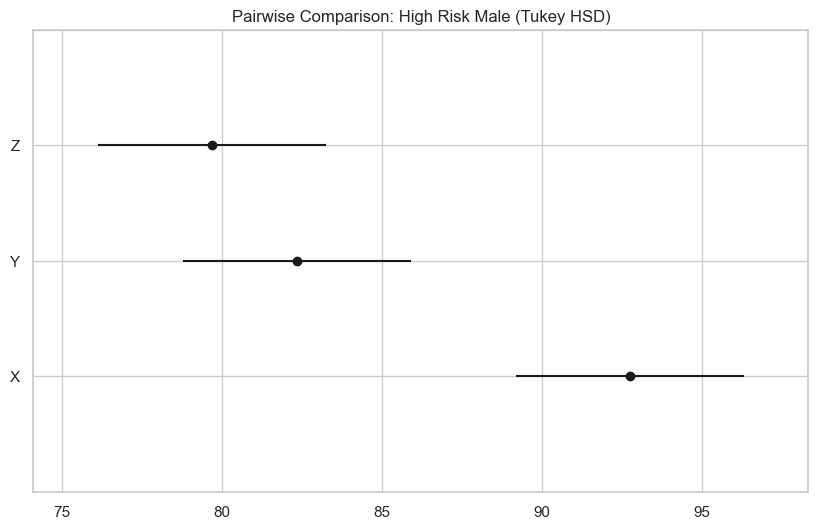

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# focus on high risk male
hr_male = df[(df['gender'] == 'male') & (df['risk'] == 'high')]
tukey = pairwise_tukeyhsd(endog=hr_male['pain_score'], groups=hr_male['treatment'], alpha=0.05)


fig, ax = plt.subplots(figsize=(8, 4))
tukey.plot_simultaneous(ax=ax)
plt.title("Pairwise Comparison: High Risk Male (Tukey HSD)")
plt.show()

The Tukey HSD visualization performed on high-risk male patients clearly demonstrates the difference between treatments.


Significant Difference: In the graph, the confidence interval for Treatment X does not overlap with Treatment Y and Treatment Z in any way. This indicates that the failure of Treatment X in this group (high pain score) is statistically certain.


Similarity: The confidence intervals for Treatment Y and Treatment Z intersect, proving that there is no statistically significant difference between these two treatments.

## CONCLUSION

The most general summary and clinical outcome of the 3-way ANOVA study is that it scientifically proves that there is "no single correct method" in migraine treatment management and that the success of treatment varies according to the patient's demographic and risk characteristics.


The most important finding in our analysis is that the three-way interaction between Gender, Risk, and Treatment is significant (p=0.0013). This indicates that we cannot explain the effect of treatments with simple statements such as "the drug is good" or "it works in women"; rather, these three factors collectively shape the pain score.



The concrete clinical picture emerging from post-hoc (Tukey HSD) tests is as follows:


High-Risk Men: Treatment X is definitely not recommended for this group, as the highest pain scores were observed with this combination. Treatment Y or Z are much safer and more effective options for these patients.


Low-Risk Women: In this group, Treatment Y yields statistically significantly better results than Treatment X and minimizes pain.


Other Groups: There was no statistically dramatic difference between the three treatment methods for low-risk men and high-risk women; patients in this group responded similarly to all three treatments.



This study emphasizes the importance of the "personalized medicine" approach. It has been scientifically proven that when treating a patient experiencing a migraine attack, selecting a treatment (especially Treatment X) without considering the patient's gender and migraine risk profile may fail to produce the expected effect (as seen in men) rather than relieving the patient's pain.